# Лабораторная работа №4
### Алцыбеева Маргарита, ИУ5-62Б

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = load_wine()
X, y = data.data, data.target

# Преобразование в DataFrame для удобства
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Проверка на пропуски
print(df.isnull().sum())

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Создание и обучение модели
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Предсказание и оценка качества модели
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print(f"Logistic Regression - Accuracy: {accuracy_log_reg:.2f}, F1 Score: {f1_log_reg:.2f}")


Logistic Regression - Accuracy: 1.00, F1 Score: 1.00


In [4]:
from sklearn.svm import SVC

# Создание и обучение модели
svm = SVC()
svm.fit(X_train, y_train)

# Предсказание и оценка качества модели
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM - Accuracy: {accuracy_svm:.2f}, F1 Score: {f1_svm:.2f}")


SVM - Accuracy: 1.00, F1 Score: 1.00


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Создание и обучение модели
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Предсказание и оценка качества модели
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print(f"Decision Tree - Accuracy: {accuracy_tree:.2f}, F1 Score: {f1_tree:.2f}")


Decision Tree - Accuracy: 0.94, F1 Score: 0.94


In [6]:
model_names = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [accuracy_log_reg, accuracy_svm, accuracy_tree]
f1_scores = [f1_log_reg, f1_svm, f1_tree]

for name, acc, f1 in zip(model_names, accuracies, f1_scores):
    print(f"{name} - Accuracy: {acc:.2f}, F1 Score: {f1:.2f}")


Logistic Regression - Accuracy: 1.00, F1 Score: 1.00
SVM - Accuracy: 1.00, F1 Score: 1.00
Decision Tree - Accuracy: 0.94, F1 Score: 0.94


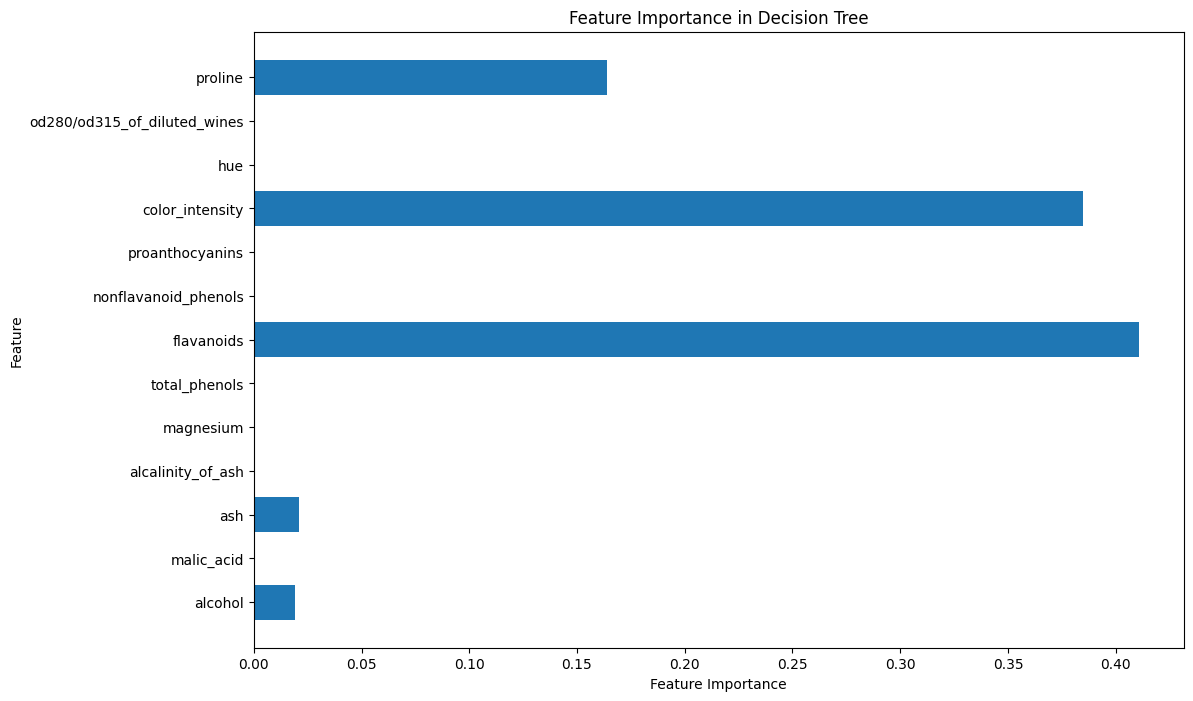

In [7]:
import matplotlib.pyplot as plt

# Важность признаков
feature_importances = tree.feature_importances_
features = data.feature_names

# Построение графика
plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.show()


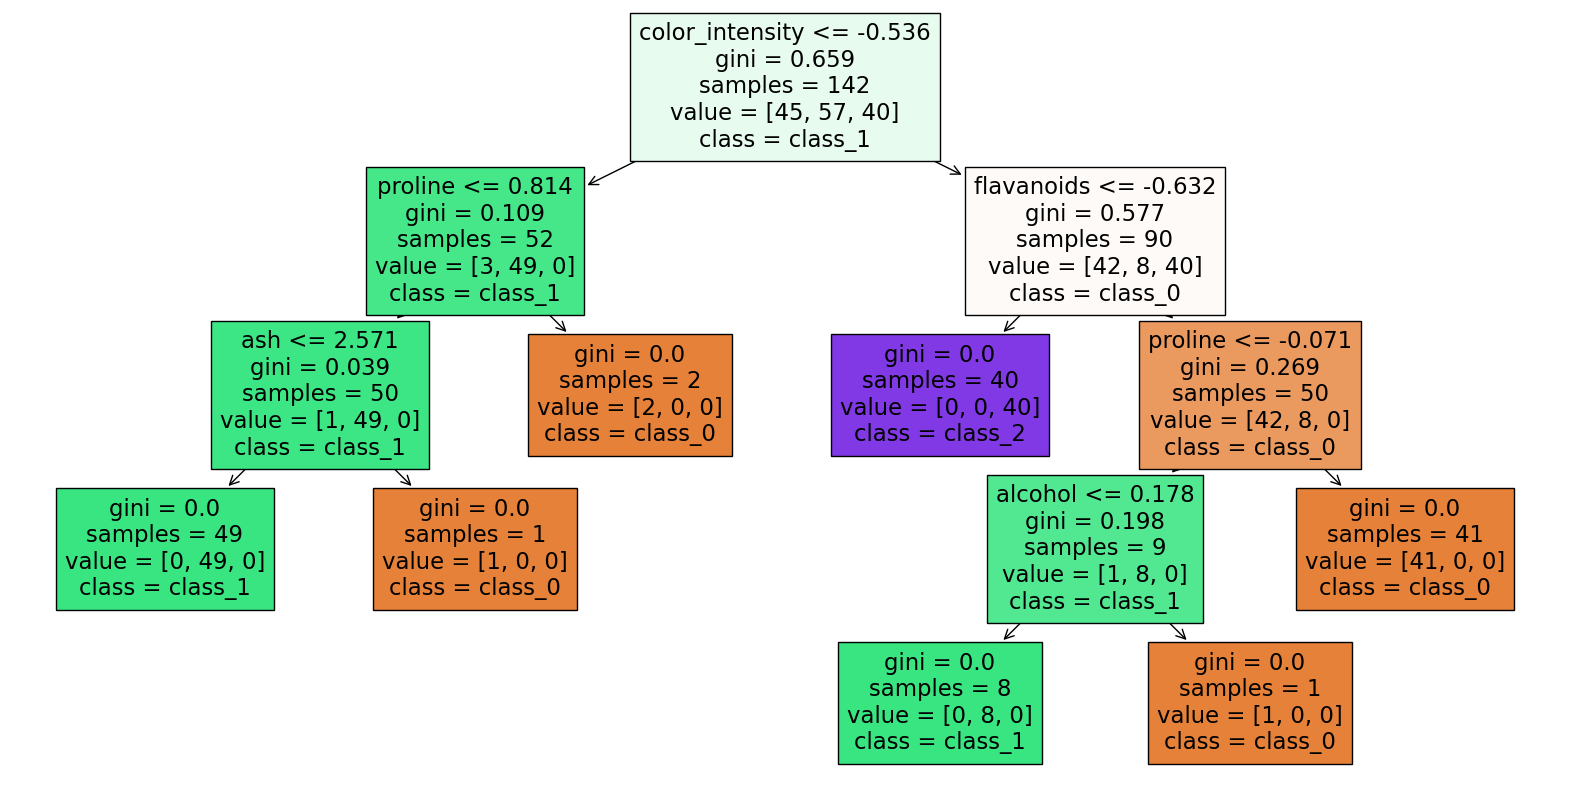

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()
